# Get the entire repository

In [1]:
# Get the entire archive (maybe you already have it)
! git clone https://github.com/UBC-Astrophysics/QEDSurface.git

Cloning into 'QEDSurface'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1712 (delta 34), reused 1 (delta 0), pack-reused 1661
Receiving objects: 100% (1712/1712), 67.67 MiB | 20.31 MiB/s, done.
Resolving deltas: 100% (692/692), done.
Checking out files: 100% (1618/1618), done.


In [ ]:
# change the directory if you have to
import os
os.chdir('QEDSurface/magnetar.py')


In [6]:
# update just in case
! git pull

Already up to date.


# Load Libraries

In [7]:
import numba
import numpy as np
from Magnetar import pfield, pfield_array, surface_model
import matplotlib.pyplot as plt


# Work with a single orientation

## Load the propagation file (pfield)

In [10]:
pfield_test=pfield()
pfield_test.loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')



## Load the surface map

In [9]:
import glob
allsurface=surface_model()
allsurface.loaddata(glob.glob('Sample_Atmospheres/doubleBB_h/*.int'))
aa=allsurface.mcolat
# copy the front surface to the back of the star
# add the angles
allsurface.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
allsurface.patches=allsurface.patches+allsurface.patches[::-1]

## Calculate intensities across the image

In [11]:
# Calculate the intensity across the surface at 1.65426 keV as observed
pfield_test.recalculate(1.65426,allsurface,gtt=(1-2*2.0/10.0)**0.5)

(1093.828016529843, -1073.7088231657501)

In [12]:
print(allsurface.mcolat)
# print(pfield_test.qmean/pfield_test.imean)

[0.0, 1.6, 2.0, 9.0, 18.195, 31.788, 41.41, 49.458, 56.633, 63.256, 69.513, 75.522, 81.373, 98.627, 104.478, 110.487, 116.744, 123.36699999999999, 130.542, 138.59, 148.212, 161.805, 171.0, 178.0, 178.4, 180.0]


In [13]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(allsurface,gtt=(1-2*2.0/10.0)**0.5)
ee=pfield_test.ebins
ivec=pfield_test.iint
qvec=pfield_test.qint


In [16]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [17]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
ivec=pfield_test.iint
qvec=pfield_test.qint
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.6e22*ssabs)

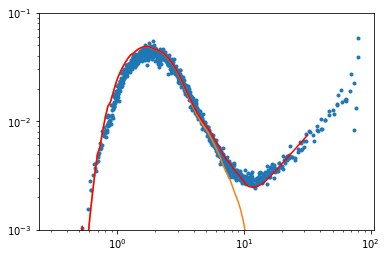

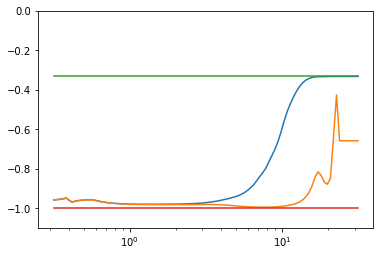

In [18]:
# plot the model against the data
norm=1.7e4
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec/norm)
plt.loglog(ee,totabs*(ivec/norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/norm)/(ivec/norm+ee**1.3/1.2e4))
plt.plot(ee,qvec/ivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

# Work with all orientations

## Load the orientation files

In [19]:
pfieldarray_test=pfield_array()
pfieldarray_test.loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [ ]:
pfieldarray_test.calcvalues(allsurface,gtt=(1-2*2.0/10.0)**0.5)

## Plot the mean intensity over the orientations

In [ ]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

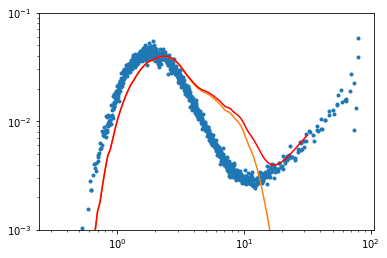

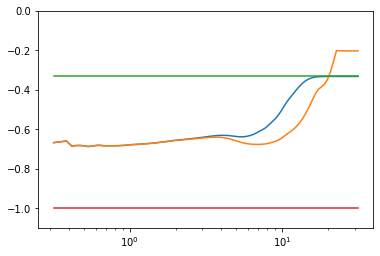

In [15]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*totivec*ee/4e4)
plt.loglog(ee,totabs*(totivec*ee/4e4+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec/1.6e4)/(totivec/1.6e4+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

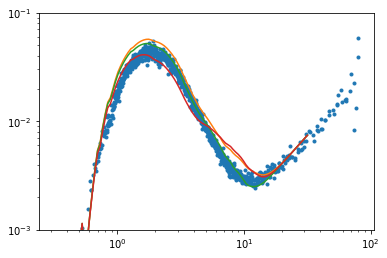

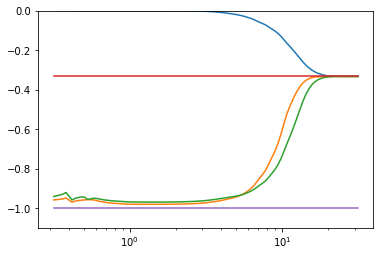

In [16]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivec[0]/1.6e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[3]/1.6e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[6]/1.6e4+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[0]/1.6e4)/(ivec[0]/1.6e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]/1.6e4)/(ivec[3]/1.6e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[6]/1.6e4)/(ivec[6]/1.6e4+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.0)
plt.show()

In [17]:
pf30=pfield()
pf30.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pf30.recalculate(5,allsurface)

(542.150295008111, -222.03240175196683)

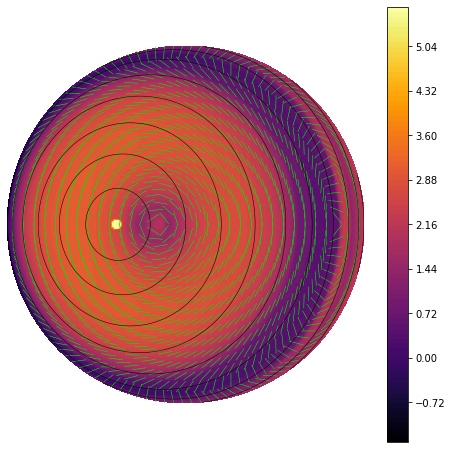

In [18]:
q=pf30.plot(datamap=np.log10(pf30.data['X']+pf30.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30NoQED.pdf',bbox_inches='tight')

In [19]:
pf30Q=pfield()
pf30Q.loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')
pf30Q.recalculate(5,allsurface)


(542.1323227281072, -532.4106949979113)

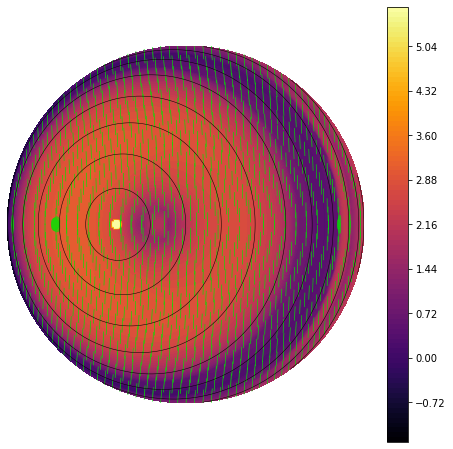

In [20]:
q=pf30Q.plot(datamap=np.log10(pf30Q.data['X']+pf30Q.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30.pdf',bbox_inches='tight')

In [21]:
ep = np.logspace(1.51,2,20)
enew = np.concatenate((ee,ep))
ssabs2=np.interp(enew,eabs,sabs)/(enew)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs2=np.exp(-0.63e22*ssabs2)
ivec3ext = np.concatenate((ivec[3],np.full(20,ivec[3][-1])))
qvec3ext = np.concatenate((qvec[3],np.full(20,qvec[3][-1])))
ivecNext = np.concatenate((ivecNQED30,np.full(20,ivecNQED30[-1])))
qvecNext = np.concatenate((qvecNQED30,np.full(20,qvecNQED30[-1])))
plt.loglog(datae,dataf,'.',markersize=3)
plt.loglog(enew,totabs2*(ivec3ext/1.7e4),'k--',label='H atmo + HS')
plt.loglog(enew,totabs2*(enew**1.25/1.0e4),'k:',label='PL')
plt.loglog(enew,totabs2*(ivec3ext/1.7e4+enew**1.25/1.0e4),'r',label='Total',linewidth=2)
plt.xlim(0.5,1.0e2)
plt.ylim(1e-4,1e-1)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$E\,f_E[\rm{keV}^2 \rm{cm}^{-2}\rm{s}^{-1}\rm{keV}^{-1}]$')
plt.savefig('HotSpot.pdf',bbox_inches='tight')
plt.show()
#plt.plot(ee,totqvec/totivec)
#plt.plot([enew[0],enew[-1]],[-1.0,-1.0],'k')
plt.plot(enew[0:82],qvec3ext[0:82]/ivec3ext[0:82],'k--',label='H atmo + HS')
plt.plot([enew[31],enew[-1]],[-0.33,-0.33],'k:',label='PL')
plt.plot(enew,(-enew**1.25/1.0e4/50+qvecNext/1.6e4)/(ivecNext/1.6e4+enew**1.3/1.2e4),label='Total w/o QED')
plt.plot(enew,(-enew**1.25/1.0e4/3+qvec3ext/1.7e4)/(ivec3ext/1.7e4+enew**1.25/1.0e4),'r',label='Total w/ QED',linewidth=2)
plt.xscale("log")
plt.xlim(0.5,1.0e2)
plt.ylim(-1.1,0.1)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('HotSpotQI.pdf',bbox_inches='tight')
plt.show()

NameError: ignored

NameError: ignored

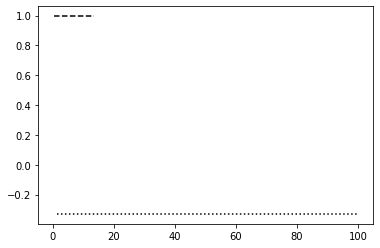

In [24]:
plt.plot(enew[0:82],qvec3ext[0:82]/ivec3ext[0:82],'k--',label='H atmo + HS')
plt.plot([enew[31],enew[-1]],[-0.33,-0.33],'k:',label='PL')
plt.plot(ee,(qvecNQED30/1.6e4)/(ivecNQED30/1.6e4),label='Total w/o QED')
plt.plot(enew,(qvec3ext/1.7e4)/(ivec3ext/1.7e4),'r',label='Total w/ QED',linewidth=2)
plt.xscale("log")
plt.xlim(0.5,1.0e2)
plt.ylim(-1.1,0.0)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')

In [25]:
pfii=pfield()
pfii.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pfiNQED30=pfii

In [26]:
iint,qint=[],[]
for en in ee:
    pfiNQED30.recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED30.imean)
    qint.append(pfiNQED30.qmean)
ivecNQED30=iint
qvecNQED30=qint
ivecNQED30 = np.array(ivecNQED30)
qvecNQED30 = np.array(qvecNQED30)

In [27]:
pfii=pfield()
pfii.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_45')
pfiNQED45=pfii

In [28]:
iint,qint=[],[]
for en in ee:
    pfiNQED45.recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED45.imean)
    qint.append(pfiNQED45.qmean)
ivecNQED45=iint
qvecNQED45=qint
ivecNQED45 = np.array(ivecNQED45)
qvecNQED45 = np.array(qvecNQED45)

In [29]:
pfiNQED75=pfield()
pfiNQED75.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_75')

In [30]:
iint,qint=[],[]
for en in ee:
    pfiNQED75.recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED75.imean)
    qint.append(pfiNQED75.qmean)
ivecNQED75=iint
qvecNQED75=qint
ivecNQED75 = np.array(ivecNQED75)
qvecNQED75 = np.array(qvecNQED75)

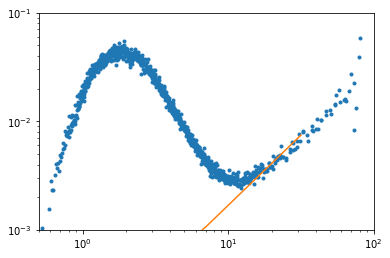

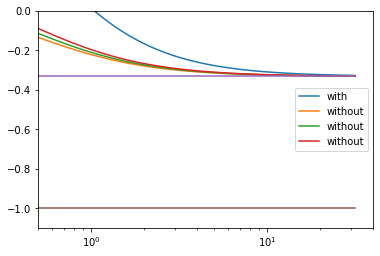

In [31]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivecNQED45/1.6e4+ee**1.3/1.2e4))
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)
plt.show()

plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[4]/1.6e4)/(ivec[4]/1.6e4+ee**1.3/1.2e4),label='with')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED30/1.6e4)/(ivecNQED30/1.6e4+ee**1.3/1.2e4),label='without')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED45/1.6e4)/(ivecNQED45/1.6e4+ee**1.3/1.2e4),label='without')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED75/1.6e4)/(ivecNQED75/1.6e4+ee**1.3/1.2e4),label='without')
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.legend()
plt.xlim(0.5,40)
plt.ylim(-1.1,0.0)
plt.savefig('HS.pdf',bbox_inches='tight')
plt.show()

In [33]:
ee2= np.logspace(-0.1,2,1000)
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee2,eabs,sabs)/(ee2)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs2=np.exp(-1.28e22*ssabs)

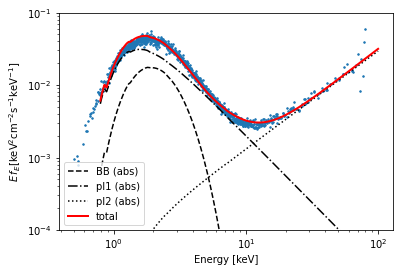

In [34]:
plt.loglog(datae,dataf,'.',markersize=3)
plt.loglog(ee2,totabs2*ee2**3/(np.exp(ee2/0.48)-1)/5,'k--',label='BB (abs)')
plt.loglog(ee2,totabs2*ee2**(-1.85)/7,'k-.',label='pl1 (abs)')
plt.loglog(ee2,totabs2*ee2**1.35/1.7e4,'k:',label='pl2 (abs)')
plt.loglog(ee2,totabs2*(ee2**(-1.85)/7+ee2**3/(np.exp(ee2/0.48)-1)/5+ee2**1.4/2e4),'r',label='total',linewidth=2)
plt.ylim(1e-4,1e-1)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$E\,f_E[\rm{keV}^2 \rm{cm}^{-2}\rm{s}^{-1}\rm{keV}^{-1}]$')
plt.savefig('4U.pdf',bbox_inches='tight')
plt.show()


In [35]:
eCompO,QIcompO = np.loadtxt("CompO.txt",unpack=True)

OSError: ignored

In [36]:
eNob,QINob = np.loadtxt("Nobili.txt",unpack=True)

OSError: ignored

NameError: ignored

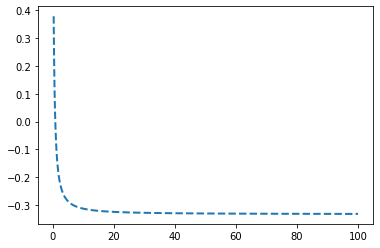

In [37]:
plt.plot(enew,(-enew**1.25/1.0e4/3+qvec3ext/1.7e4)/(ivec3ext/1.7e4+enew**1.25/1.0e4),'--',linewidth=2)
plt.plot(eCompO,QIcompO,'-.',linewidth=2)
plt.plot(eNob,QINob,':',linewidth=2)
plt.xscale("log")
plt.xlim(0.5,1.0e2)
#plt.ylim(-1.1,0.1)
#plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('Mag3.pdf',bbox_inches='tight')
plt.show()

NameError: ignored

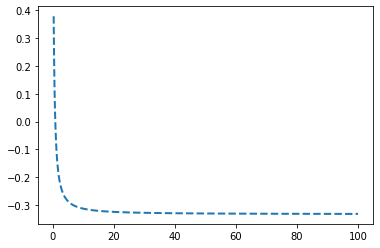

In [38]:
plt.plot(enew,(-enew**1.25/1.0e4/3+qvec3ext/1.7e4)/(ivec3ext/1.7e4+enew**1.25/1.0e4),'--',linewidth=2)
plt.plot(eCompO,QIcompO,'-.',linewidth=2)
plt.plot(eNob,QINob,':',linewidth=2)
#plt.xscale("log")
plt.xlim(1,1.0e1)
#plt.ylim(-1.1,0.1)
#plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('Mag3small.pdf',bbox_inches='tight')
plt.show()

In [ ]:
for _i,_a in enumerate(mufil):
    np.savetxt('fern_input_%g.dat' % _a,np.transpose([ee,ivec[_i],qvec[_i]]))

In [40]:
! make -C ../pfield

make: Entering directory '/content/QEDSurface/pfield'
gcc -c -O2 pfield.c
gcc -c -O2 integrate_path.c
gcc -c -O2 phix.c
gcc -c -O2 calc_derivs.c
gcc -c -O2 loadmodels.c
gcc -c -O2 calcfpsi.c
gcc -c -O2 qromb.c
gcc -c -O2 bsstep.c
gcc -c -O2 odeint.c
gcc -c -O2 rk4.c
gcc -c -O2 rkqc.c
gcc -c -O2 polint.c
gcc -c -O2 trapzd.c
gcc -c -O2 nrutil.c
gcc -c -O2 mmid.c
gcc -c -O2 rzextr.c
gcc -o pfield pfield.o integrate_path.o phix.o calc_derivs.o loadmodels.o calcfpsi.o qromb.o bsstep.o odeint.o rk4.o rkqc.o polint.o trapzd.o nrutil.o mmid.o rzextr.o -lm
make: Leaving directory '/content/QEDSurface/pfield'


In [42]:
! ../pfield/pfield 1e32 1e17 1.5e5 1e6 20 > p

In [43]:
! more p

#  ../pfield/pfield 1e32 1e17 1.5e5 1e6 20
#  nu= 1e+17 Hz B0= 2.26549 BQED = 1e+14 G E= 0.413566 keV
#  Rinf= 1.19523e+06 cm xmax= 1 radius0= 1e+06 cm mass= 150000 cm = 1.01551 Msun
 0.2*omega0R= 1.66454e+09
#
#  Column 1  - b, impact parameter in cm
#  Column 2  - beta, angle in plane of sky between image element and magnetic mo
ment [radians]
#              beta defines the angle of the photon geodesic plane with respect 
to the magnetic moment
#  Column 3  - s1 final Stokes Q [relative to photon geodesic plane]
#  Column 4  - s2 final Stokes U
#  Column 5  - s3 final Stokes V
#  Column 6  - mago, magnitude of final value of Omega
#  Column 7  - o1 final Omega Q [relative to geodesic plane]
#              the final values of Omega give the direction of the final B-field
 wrt geodesic plane
#              the first component is perpendicuar to B-field
#  Column 8  - o2 final Omega U
#  Column 9  - o3 final Omega V
#  Column 10 - magnetic colatitude of emission point [degrees]
#  Colu